<a href="https://colab.research.google.com/github/shakshiVarma72/pySparkCode/blob/Assignments_Codes/Content_of_Pyspark's_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar zxvf spark-3.3.2-bin-hadoop3.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"

!pip install pyspark==3.2.1
!pip install --upgrade findspark

import pyspark
from pyspark.sql import SparkSession


Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ Packages [81.0 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1,079 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2,636 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:13 http://ppa.launchpad.net/graphi

# DAY 1

PYSPARK SESSION:

To create a PySpark session, you need to import the `SparkSession` class from the `pyspark.sql` module. Here's an example of creating a PySpark session and explaining the functions used:


In [ ]:
from pyspark.sql import SparkSession
# Create a SparkSession
spark = SparkSession.builder \
    .appName("MySparkApp") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()


Explanation of the functions used:

1. *'SparkSession.builder`* : Creates a builder for the SparkSession.

2. *`appName("MySparkApp")`*: Sets the name of the Spark application.

3. *`config("spark.some.config.option", "some-value")`*: Sets configuration options for Spark. It allows you to specify various configuration properties based on your needs. In this example, we set a configuration option with a key-value pair.

4. *`getOrCreate()`*: Retrieves an existing SparkSession or creates a new one if it doesn't exist.

To add more paths, such as HDFS paths, you can use the `config()` function to set the required configurations. Here's an example:


spark = SparkSession.builder \
    .appName("MySparkApp") \
    .config("spark.some.config.option", "some-value") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://namenode:port") \
    .getOrCreate()


In this example, we add the HDFS path by setting the "spark.hadoop.fs.defaultFS" configuration option to the desired HDFS URL.



We are using in our scripts:

**spark = SparkSession.builder.appName(‘Script_name’).master("spark://master:7077")\
                    .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer")\
                    .config("spark.memory.offHeap.enabled",'true')\
                    .config("spark.memory.offHeap.size","10g")\
                    .config("spark.driver.memory","32g")\
                    .config("spark.executor.memory","32g")\
                    .config("spark.driver.maxResultSize","0")\
                    .config('spark.sql.debug.maxToStringFields','1000')\
                    .getOrCreate()**

*master("spark://master:7077")*: indicating that the Spark application will connect to a Spark cluster running on the specified master node

*config("spark.serializer", "org.apache.spark.serializer.KryoSerializer")* : Configures the Spark application to use the KryoSerializer for object serialization. KryoSerializer is a high-performance serializer in Spark that provides better performance compared to the default Java serializer.

*config("spark.memory.offHeap.enabled",'true')* : Enables off-heap memory management in Spark. Off-heap memory is memory that is not managed by the JVM and can be beneficial for reducing the memory overhead of objects stored in Spark.

*config("spark.memory.offHeap.size","10g")* :  Sets the size of the off-heap memory to 10 gigabytes. This determines the amount of memory allocated outside the JVM heap for caching and other Spark operations.

*config("spark.driver.memory","32g")
 config("spark.executor.memory","32g")* : Sets the amount of memory allocated to the driver program and executor running on the Spark master node. In this case, it is set to 32 gigabytes.

*config("spark.driver.maxResultSize","0")* : Sets the maximum size of the result that can be returned to the driver program. In this case, it is set to 0, indicating that there is no maximum limit on the result size

*config('spark.sql.debug.maxToStringFields','1000')* : Sets the maximum number of fields to display when converting a DataFrame to a string for debugging purposes. Here, it is set to 1000, allowing a large number of fields to be displayed


**Assignments on creating different types of PySpark sessions:**

1. Create a PySpark session with any app name and a specific master URL(spark://master:7077)

2.  Create a PySpark session with additional Spark configuration options like executor memory - 2gb and driver memory - 1gb

Creating dataframes:

1. Creating DataFrames from Existing Data Structures:


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Creating a DataFrame from a list
data = [("Aman", 25), ("Abhi", 30), ("Annu", 35)]
df = spark.createDataFrame(data, ["Name", "Age"])
df.show()


+----+---+
|Name|Age|
+----+---+
|Aman| 25|
|Abhi| 30|
|Annu| 35|
+----+---+



2. Reading Data from External Sources:

The **header** parameter is used to indicate whether the first row of the file contains the column names or headers. When header=True, PySpark will consider the first row of the file as the header and use it to name the columns in the DataFrame.

The **schema** parameter is used to infer the schema of the DataFrame based on the data in the file. When schema=True, PySpark will examine the data in the file and attempt to infer the data types of each column.

By default, header is set to False, and PySpark assumes that the file does not contain a header row. Similarly, schema is set to None, and PySpark infers the schema based on the data types it detects in the file.


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Reading a CSV file into a DataFrame
house_df = spark.read.csv("/content/sample_data/california_housing_train.csv", header=True, inferSchema=True)
house_df.show()


+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
|  -114.58|   33.63|    

- Reading a text file:

- Syntax: df = spark.read.text("path/to/file.txt")
- Usage: Reads a text file and creates a DataFrame where each line of the file is a row in the DataFrame.
- Example Task: Read a text file and display its contents as a DataFrame.

In [ ]:
# df = spark.read.text("/content/sample_data/practice.txt")
df.show()


+----+---+
|Name|Age|
+----+---+
|Aman| 25|
|Abhi| 30|
|Annu| 35|
+----+---+



- Write CSV File:
- Explanation: The write.csv() function in PySpark is used to write a DataFrame to a CSV file. It saves the contents of the DataFrame as comma-separated values (CSV) format.
- Usage: path/to/save.csv: Specifies the path where the CSV file will be saved.
- mode: Optional parameter to specify the write mode. It can take values like "overwrite" (default), "append", or "ignore".
- header: Optional parameter to specify whether to include the header row in the CSV file. By default, it is set to True.

3. Transforming an Existing DataFrame :

You can create a new DataFrame by applying transformations on an existing DataFrame. PySpark provides various transformations like select, filter, groupBy, etc.

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Creating a DataFrame from a list
data = [("Aman", 25,100,50), ("Abhi", 30,80,80), ("Annu", 35,60,70)]
df = spark.createDataFrame(data, ["Name", "Age","Maths","Hindi"])

# Creating a new dataframe using a specific column of an existing dataframe
new_df=df.select('Name')
new_df.show()


+----+
|Name|
+----+
|Aman|
|Abhi|
|Annu|
+----+



**Assignment on creating a dataframe** :
 1. Create a DataFrame from a sample california_housing_train.csv  file and filter rows where population is greater than 1000.



Transformations:

1. Add Column:

- Explanation: Adding a column to a DataFrame allows you to introduce new computed or derived values based on existing columns.
- Syntax: `df.withColumn("new_column_name", <expression>)`

- Usage: It is used when you want to add a new column to an existing DataFrame.



In [ ]:
from pyspark.sql.functions import col

df=df.withColumn("Total marks", col("Maths") + col("Hindi"))
df.show()

+----+---+-----+-----+-----------+
|Name|Age|Maths|Hindi|Total marks|
+----+---+-----+-----+-----------+
|Aman| 25|  100|   50|        150|
|Abhi| 30|   80|   80|        160|
|Annu| 35|   60|   70|        130|
+----+---+-----+-----+-----------+



- Add a new column named "total_income" to a DataFrame `df` by multiplying the
"population" column with the "median_income" column.


2. count:

- Syntax: df.count()
- Usage: Returns the number of rows in the DataFrame.
- Example Task: Count the number of records in a DataFrame.

In [ ]:
# count = df.count()
print("Number of records: ", df.count())


Number of records:  3


4. Print Columns:

- Syntax: df.columns
- Usage: Returns a list of column names in the DataFrame.
- Example Task: Print the names of the columns in a DataFrame.

In [ ]:
columns = df.columns
print("Columns: ", columns)


Columns:  ['Name', 'Age', 'Maths', 'Hindi', 'Total marks']


5. print schema:

- Syntax: df.printSchema()
- Usage: Prints the schema of the DataFrame, which includes column names and their data types.
- Example Task: Print the schema of a DataFrame.


In [ ]:
df.printSchema()


root
 |-- Name: string (nullable = true)
 |-- Age: long (nullable = true)
 |-- Maths: long (nullable = true)
 |-- Hindi: long (nullable = true)
 |-- Total marks: long (nullable = true)



2. Drop Column:

- Explanation: Dropping a column removes it from the DataFrame, reducing the number of columns.
- Syntax: `df.drop("column_name")`
- Usage: It is used when you want to remove a specific column from a DataFrame.


In [ ]:
data = [("Aman", 25,100,50), ("Abhi", 30,80,80), ("Annu", 35,60,70)]
df = spark.createDataFrame(data, ["Name", "Age","Maths","Hindi"])

df = df.drop("Age")
df.show()


+----+-----+-----+
|Name|Maths|Hindi|
+----+-----+-----+
|Aman|  100|   50|
|Abhi|   80|   80|
|Annu|   60|   70|
+----+-----+-----+



- **Task**: Remove the column named "median_income" from a DataFrame `df`.

2. Select Column:
- Explanation: Selecting columns allows you to choose specific columns from a DataFrame for further processing.
- Syntax: `df.select("column1", "column2", ...)`
- Usage: It is used when you want to work with specific columns in a DataFrame.


In [ ]:
df = df.select("Name", "Hindi")
df.show()


+----+-----+
|Name|Hindi|
+----+-----+
|Aman|   50|
|Abhi|   80|
|Annu|   70|
+----+-----+



**Task** : Select the columns total_rooms|total_bedrooms|population|households|median_income from a DataFrame `df`.

3. Filter Column:
- Explanation: Filtering allows you to extract rows from a DataFrame that satisfy a certain condition.
- Syntax: `df.filter(<condition>)` or `df.where(<condition>)`
- Usage: It is used when you want to subset a DataFrame based on certain conditions.


In [ ]:
data = [("Aman", 25,100,50), ("Abhi", 30,80,80), ("Annu", 35,60,70)]
df = spark.createDataFrame(data, ["Name", "Age","Maths","Hindi"])

filtered_df = df.filter(df["Age"] > 30)
filtered_df.show()


+----+---+-----+-----+
|Name|Age|Maths|Hindi|
+----+---+-----+-----+
|Annu| 35|   60|   70|
+----+---+-----+-----+



- **Task**: Filter the DataFrame `df` to include only the rows where the "total_rooms" column is greater than 2550.

4. Collect:
- Explanation: Collecting a DataFrame returns all the rows as a list of Row objects, which can be useful for further processing. Retrieve all the elements of the dataset (from all nodes) to the driver node
- Syntax: `df.collect()`
- Usage: It is used when you want to retrieve all the rows from a DataFrame and perform operations on the collected data.



In [ ]:
collected_data = df.collect()
for row in collected_data:
    print(row)


Row(Name='Aman', Age=25, Maths=100, Hindi=50)
Row(Name='Abhi', Age=30, Maths=80, Hindi=80)
Row(Name='Annu', Age=35, Maths=60, Hindi=70)


- Task: Collect all the rows from a DataFrame `df` and print them.

5. First:
- Explanation: The `first()` function returns the first row of a DataFrame.
- Syntax: `df.first()`
- Usage: It is used when you want to retrieve the first row of a DataFrame.
- Task: Get the first row from a DataFrame `df` and print it.


In [ ]:
first_row = df.first()
print(first_row)


Row(Name='Aman', Age=25, Maths=100, Hindi=50)


**Task**: Get the first row from a DataFrame `df` and print it.

# **DAY 2**

1. **orderBy/sort**:
- Explanation: `orderBy` and `sort` are used to sort the rows in a DataFrame based on one or more columns in ascending or descending order.
- Syntax:
```python
df.orderBy("column1")  # Sorts in ascending order
df.orderBy(df.column1.desc())  # Sorts in descending order

Sorting the DataFrame by the "age" column in descending order.

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

data = [("Aman", 25,100,50), ("Abhi", 30,80,80), ("Annu", 35,60,70)]
df = spark.createDataFrame(data, ["Name", "Age","Maths","Hindi"])

sorted_df = df.orderBy(df.Age.desc())
sorted_df.show()

+----+---+-----+-----+
|Name|Age|Maths|Hindi|
+----+---+-----+-----+
|Annu| 35|   60|   70|
|Abhi| 30|   80|   80|
|Aman| 25|  100|   50|
+----+---+-----+-----+



- Task - Sort the df on the basis of population in ascending order.

Using sort :  Sort DataFrame in ascending order based on a single column:

In [ ]:
from pyspark.sql.functions import col

# Create a DataFrame
data = [("Aman", 25,100,50), ("Abhi", 30,80,80), ("Annu", 35,60,70)]
df = spark.createDataFrame(data, ["Name", "Age","Maths","Hindi"])

# Sort the DataFrame in ascending order based on the "Age" column
sorted_df = df.sort(col("Age").desc())
sorted_df.show()


+----+---+-----+-----+
|Name|Age|Maths|Hindi|
+----+---+-----+-----+
|Annu| 35|   60|   70|
|Abhi| 30|   80|   80|
|Aman| 25|  100|   50|
+----+---+-----+-----+



Task 2: Sort DataFrame in descending order based on multiple columns:



In [ ]:
# Create a DataFrame
data = [("Aman", 25,100,50), ("Abhi", 30,80,80), ("Annu", 35,60,70)]
df = spark.createDataFrame(data, ["Name", "Age","Maths","Hindi"])

# Sort the DataFrame in descending order based on the "Age" and "Name" columns
sorted_df = df.sort(col("Age").desc(), col("Name").desc())
sorted_df.show()


+----+---+-----+-----+
|Name|Age|Maths|Hindi|
+----+---+-----+-----+
|Annu| 35|   60|   70|
|Abhi| 30|   80|   80|
|Aman| 25|  100|   50|
+----+---+-----+-----+



In [ ]:
# Create a DataFrame
data = [("Aman",'IT',30000,'New Delhi'), ("Abhi", 'UI',35000,'Haryana'), ("Annu", 'IT',35000,'Punjab')]
df = spark.createDataFrame(data, ["Name", "department","salary","State"])
print('Original dataframe')
df.show()

grouped_df = df.groupBy("department").agg({"salary": "sum"})
print('After group by on department and sum(salary)')
grouped_df.show()

grouped_df = df.groupBy("department").agg({"salary": "max"})
print('After group by on department and max(salary)')
grouped_df.show()

# grouped_df = df.groupBy("department").agg({"salary": "min"})
grouped_df = df.groupBy("department").min("salary")

print('After group by on department and min(salary)')
grouped_df.show()

# grouped_df = df.groupBy("department").agg({"salary": "avg"})
grouped_df = df.groupBy("department").avg("salary")
print('After group by on department and avg(salary)')
grouped_df.show()

grouped_df = df.groupBy("department").mean("salary")
print('After group by on department and max(mean)')
grouped_df.show()

grouped_df = df.groupBy("department").count()
print('After group by on department count')
grouped_df.show()

Original dataframe
+----+----------+------+---------+
|Name|department|salary|    State|
+----+----------+------+---------+
|Aman|        IT| 30000|New Delhi|
|Abhi|        UI| 35000|  Haryana|
|Annu|        IT| 35000|   Punjab|
+----+----------+------+---------+

After group by on department and sum(salary)
+----------+-----------+
|department|sum(salary)|
+----------+-----------+
|        IT|      65000|
|        UI|      35000|
+----------+-----------+

After group by on department and max(salary)
+----------+-----------+
|department|max(salary)|
+----------+-----------+
|        IT|      35000|
|        UI|      35000|
+----------+-----------+

After group by on department and min(salary)
+----------+-----------+
|department|min(salary)|
+----------+-----------+
|        IT|      30000|
|        UI|      35000|
+----------+-----------+

After group by on department and avg(salary)
+----------+-----------+
|department|avg(salary)|
+----------+-----------+
|        IT|    32500.0|
| 

2. **groupBy:**
- Explanation: `groupBy` is used to group the rows in a DataFrame based on one or more columns.
- Syntax:
```python
df.groupBy("column1")
```
- Usage:
```python
df.groupBy("column1").agg({"column2": "sum"})
```
- Task: Group the DataFrame by the "department" column and calculate the total salary for each department.
```python
grouped_df = df.groupBy("department").agg({"salary": "sum"})
```

**2.2 Using Multiple Columns**

In [ ]:
# Create a DataFrame
data = [("Aman",'IT',30000,'New Delhi',2000), ("Abhi", 'UI',35000,'Haryana',1200),\
 ("Annu", 'IT',35000,'Punjab',1200),("Akshay", 'IT',25000,'New Delhi',1500),("Abhi", 'UI',40000,'Haryana',1000)]
df = spark.createDataFrame(data, ["Name", "department","salary","State","Incentive"])
print('Original dataframe')
df.show()

grouped_df = df.groupBy("department","state").sum("salary","Incentive")
print('After group by on department and state')
grouped_df.show()

print('Adding name column in group by')
df.groupBy("Name","department","state").count().show()
df.groupBy("Name","department","state").sum("salary","Incentive").show()

Original dataframe
+------+----------+------+---------+---------+
|  Name|department|salary|    State|Incentive|
+------+----------+------+---------+---------+
|  Aman|        IT| 30000|New Delhi|     2000|
|  Abhi|        UI| 35000|  Haryana|     1200|
|  Annu|        IT| 35000|   Punjab|     1200|
|Akshay|        IT| 25000|New Delhi|     1500|
|  Abhi|        UI| 40000|  Haryana|     1000|
+------+----------+------+---------+---------+

After group by on department and state
+----------+---------+-----------+--------------+
|department|    state|sum(salary)|sum(Incentive)|
+----------+---------+-----------+--------------+
|        IT|New Delhi|      55000|          3500|
|        UI|  Haryana|      75000|          2200|
|        IT|   Punjab|      35000|          1200|
+----------+---------+-----------+--------------+

Adding name column in group by
+------+----------+---------+-----+
|  Name|department|    state|count|
+------+----------+---------+-----+
|  Abhi|        UI|  Haryana

**2.3 Using more aggregates:**

In [ ]:
from pyspark.sql.functions import sum,avg,max

# Create a DataFrame
data = [("Aman",'IT',30000,'New Delhi',2000), ("Abhi", 'UI',35000,'Haryana',1200),\
 ("Annu", 'IT',35000,'Punjab',1200),("Akshay", 'IT',25000,'New Delhi',1500),("Abhi", 'UI',40000,'Haryana',1000)]
df = spark.createDataFrame(data, ["Name", "department","salary","State","Incentive"])
print('Original dataframe')
df.show()

df.groupBy("department") \
    .agg(sum("salary").alias("sum_salary"), \
         avg("salary").alias("avg_salary"), \
         sum("Incentive").alias("sum_bonus"), \
         max("Incentive").alias("max_bonus") \
     ).show()

Original dataframe
+------+----------+------+---------+---------+
|  Name|department|salary|    State|Incentive|
+------+----------+------+---------+---------+
|  Aman|        IT| 30000|New Delhi|     2000|
|  Abhi|        UI| 35000|  Haryana|     1200|
|  Annu|        IT| 35000|   Punjab|     1200|
|Akshay|        IT| 25000|New Delhi|     1500|
|  Abhi|        UI| 40000|  Haryana|     1000|
+------+----------+------+---------+---------+

+----------+----------+----------+---------+---------+
|department|sum_salary|avg_salary|sum_bonus|max_bonus|
+----------+----------+----------+---------+---------+
|        UI|     75000|   37500.0|     2200|     1200|
|        IT|     90000|   30000.0|     4700|     2000|
+----------+----------+----------+---------+---------+



**2.4 Using filter on aggregate data**

In [ ]:
from pyspark.sql.functions import sum,avg,max

# Create a DataFrame
data = [("Aman",'IT',30000,'New Delhi',2000), ("Abhi", 'UI',35000,'Haryana',1200),\
 ("Annu", 'IT',35000,'Punjab',1200),("Akshay", 'IT',25000,'New Delhi',1500),("Abhi", 'UI',40000,'Haryana',1000)]
df = spark.createDataFrame(data, ["Name", "department","salary","State","Incentive"])
print('Original dataframe')
df.show()

print('Without filter')
df.groupBy("department","State") \
    .agg(sum("salary").alias("sum_salary"), \
         avg("salary").alias("avg_salary"), \
         sum("Incentive").alias("sum_bonus"), \
         max("Incentive").alias("max_bonus")).show()

print('With filter condition where bonus is greater than 2500')
df.groupBy("department","State") \
    .agg(sum("salary").alias("sum_salary"), \
         avg("salary").alias("avg_salary"), \
         sum("Incentive").alias("sum_bonus"), \
         max("Incentive").alias("max_bonus")) \
        .where(col("sum_bonus") >= 2500).show()

Original dataframe
+------+----------+------+---------+---------+
|  Name|department|salary|    State|Incentive|
+------+----------+------+---------+---------+
|  Aman|        IT| 30000|New Delhi|     2000|
|  Abhi|        UI| 35000|  Haryana|     1200|
|  Annu|        IT| 35000|   Punjab|     1200|
|Akshay|        IT| 25000|New Delhi|     1500|
|  Abhi|        UI| 40000|  Haryana|     1000|
+------+----------+------+---------+---------+

Without filter
+----------+---------+----------+----------+---------+---------+
|department|    State|sum_salary|avg_salary|sum_bonus|max_bonus|
+----------+---------+----------+----------+---------+---------+
|        IT|New Delhi|     55000|   27500.0|     3500|     2000|
|        UI|  Haryana|     75000|   37500.0|     2200|     1200|
|        IT|   Punjab|     35000|   35000.0|     1200|     1200|
+----------+---------+----------+----------+---------+---------+

With filter condition where bonus is greater than 2500
+----------+---------+---------

**Task to do:**

data - [("Aman",'HR',20000,'New Delhi',2500), ("Abhi", 'IT',30000,'Haryana',1000),("Annu", 'HR',35000,'New Delhi',1500),("Akshay", 'UI',25000,'Gujrat',2500),("Abhi", 'IT',40000,'Haryana',1000)]

 df = spark.createDataFrame(data, ["Name", "department","salary","State","Incentive"])

- **Perform group by on "department" and "state" , sum of "salary" as sum_salary, max of "Incentive" as max_bonus, filter where "max_bonus" > '2000'.**

In [ ]:
from pyspark.sql.functions import sum,avg,max

# Create a DataFrame
data = [("Aman",'HR',20000,'New Delhi',2500), ("Abhi", 'IT',30000,'Haryana',1000),("Annu", 'HR',35000,'New Delhi',1500),("Akshay", 'UI',25000,'Gujrat',2500),("Abhi", 'IT',40000,'Haryana',1000)]
df = spark.createDataFrame(data, ["Name", "department","salary","State","Incentive"])
print('Original dataframe')
df.show()

print('With filter condition where maximum bonus is greater than 1000')
df.groupBy("department","State") \
    .agg(sum("salary").alias("sum_salary"),\
         max("Incentive").alias("max_bonus"))\
         .where(col("max_bonus") > 1000).show()

Original dataframe
+------+----------+------+---------+---------+
|  Name|department|salary|    State|Incentive|
+------+----------+------+---------+---------+
|  Aman|        HR| 20000|New Delhi|     2500|
|  Abhi|        IT| 30000|  Haryana|     1000|
|  Annu|        HR| 35000|New Delhi|     1500|
|Akshay|        UI| 25000|   Gujrat|     2500|
|  Abhi|        IT| 40000|  Haryana|     1000|
+------+----------+------+---------+---------+

With filter condition where maximum bonus is greater than 1000
+----------+---------+----------+---------+
|department|    State|sum_salary|max_bonus|
+----------+---------+----------+---------+
|        HR|New Delhi|     55000|     2500|
|        UI|   Gujrat|     25000|     2500|
+----------+---------+----------+---------+



3. **Union and Union All:**
- Explanation: The `union` operation combines two DataFrames vertically, appending the rows of one DataFrame to the other.If schemas are not the same it returns an error.
The `unionAll` operation performs the same operation but includes duplicate rows.unionAll() is deprecated since Spark “2.0.0” version and replaced with union().

- Syntax:
  ```python
  df1.union(df2)  # Union operation
  df1.unionAll(df2)  # Union All operation
  ```
- Usage: Used to combine multiple DataFrames with the same schema.
- Tasks:
  - Task 1: Union two DataFrames and display the combined result.

In [ ]:
Data1 = [("James","Sales","NY",90000,34,10000), \
    ("Michael","Sales","NY",86000,56,20000), \
    ("Robert","Sales","CA",81000,30,23000), \
    ("Maria","Finance","CA",90000,24,23000) ]

columns= ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data = Data1, schema = columns)
# df.printSchema()
print('First df')
df.show()

Data2 = [("James","Sales","NY",90000,34,10000), \
    ("Maria","Finance","CA",90000,24,23000), \
    ("Jen","Finance","NY",79000,53,15000), \
    ("Jeff","Marketing","CA",80000,25,18000), \
    ("Kumar","Marketing","NY",91000,50,21000)]
columns2= ["employee_name","department","state","salary","age","bonus"]

df2 = spark.createDataFrame(data = Data2, schema = columns2)
# df2.printSchema()
print('Second df')
df2.show()


unionDF = df.union(df2)
print('First df union second df')
unionDF.show()

'''Since the union() method returns all rows without distinct records,
we will use the distinct() function to return just one record when
duplicate exists.'''

print('Using distinct')
disDF = df.union(df2).distinct()
disDF.show()

print('Using Unionall')
unionAllDF = df.unionAll(df2)
unionAllDF.show()

dfs = [df, df2]
from functools import reduce
from pyspark.sql import DataFrame

# create merged dataframe
df_complete = reduce(DataFrame.unionAll, dfs)
print('Using list of dfs')
df_complete.show()


Data3 = [("Peter",90000,"Sales","NY",34), \
    ("Carl",9000,"Finance","CA",24), \
    ("Jason",79000,"Finance","NY",53), \
    ("Alex",80000,"Marketing","CA",25), \
    ("Leo",91000,"Marketing","NY",50)]
columns3= ["employee_name","salary","department","state","age"]

df3 = spark.createDataFrame(data = Data3, schema = columns3)
# df3.printSchema()
print('Third df')
df3.show()


'''unionByName works when both DataFrames have the same columns,
but in a different order. An optional parameter was also added in
Spark 3.1 to allow unioning slightly different schemas.'''

byNameDF = df.unionByName(df3,allowMissingColumns=True)
print('UnionByName result')
byNameDF.show()


First df
+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|        James|     Sales|   NY| 90000| 34|10000|
|      Michael|     Sales|   NY| 86000| 56|20000|
|       Robert|     Sales|   CA| 81000| 30|23000|
|        Maria|   Finance|   CA| 90000| 24|23000|
+-------------+----------+-----+------+---+-----+

Second df
+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|        James|     Sales|   NY| 90000| 34|10000|
|        Maria|   Finance|   CA| 90000| 24|23000|
|          Jen|   Finance|   NY| 79000| 53|15000|
|         Jeff| Marketing|   CA| 80000| 25|18000|
|        Kumar| Marketing|   NY| 91000| 50|21000|
+-------------+----------+-----+------+---+-----+

First df union second df
+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+---

- **Task:** Copy the existing df you are using, modify it (change name, rearrange column) then use unionByName to merge both the dataframes.

4. **Renaming Columns:**
- Explanation: Renaming columns allows you to change the names of specific columns in a DataFrame.
- Syntax:
  ```python
  df.withColumnRenamed("old_column", "new_column")
  ```
- Usage: Change the name of a column in a DataFrame.
- Tasks:
  - Task 1: Rename the "old_name" column to "new_name".
  ```python
  df = df.withColumnRenamed("old_name", "new_name")
  ```

In [ ]:
Data1 = [("James","Sales","NY",90000,34,10000), \
    ("Michael","Sales","NY",86000,56,20000), \
    ("Robert","Sales","CA",81000,30,23000), \
    ("Maria","Finance","CA",90000,24,23000) ]
columns= ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data = Data1, schema = columns)

df = df.withColumnRenamed("bonus", "Incentive")
df.show()


+-------------+----------+-----+------+---+---------+
|employee_name|department|state|salary|age|Incentive|
+-------------+----------+-----+------+---+---------+
|        James|     Sales|   NY| 90000| 34|    10000|
|      Michael|     Sales|   NY| 86000| 56|    20000|
|       Robert|     Sales|   CA| 81000| 30|    23000|
|        Maria|   Finance|   CA| 90000| 24|    23000|
+-------------+----------+-----+------+---+---------+



**Task**: Rename column employee_name to worker_name.

5. **dropDuplicates and distinct:**

Explanation:Return a new DataFrame with duplicate rows removed.

- Syntax:
  ```python
  df.dropDuplicates(["column1", "column2"])  # Specify the columns to check for duplicates
  ```
- Usage: Remove duplicate columns from a DataFrame.
- Tasks:
  - Task 1: Remove duplicate columns from the DataFrame.

In [ ]:
Data = [("James","Sales","NY",90000,34,10000), \
    ("Michael","Sales","NY",86000,56,20000), \
    ("Robert","Sales","CA",81000,30,23000), \
    ("Maria","Finance","CA",90000,24,23000),\
    ("Maria","Finance","CA",90000,24,23000),\
    ("Michael","Sales","NY",86000,56,20000)  ]
columns= ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data = Data, schema = columns)
df.show()

print('dropping duplicate salary')
df.dropDuplicates(["salary"]).show()

print('dropping duplicate department+salary')
df = df.dropDuplicates(["department","salary"])
df.show()

df=df.distinct()
print('After applying distinct')
df.show()

print('dropped duplicate columns')
cols = ("state","state","bonus")
df.drop(*cols).show()


+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|        James|     Sales|   NY| 90000| 34|10000|
|      Michael|     Sales|   NY| 86000| 56|20000|
|       Robert|     Sales|   CA| 81000| 30|23000|
|        Maria|   Finance|   CA| 90000| 24|23000|
|        Maria|   Finance|   CA| 90000| 24|23000|
|      Michael|     Sales|   NY| 86000| 56|20000|
+-------------+----------+-----+------+---+-----+

dropping duplicate salary
+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|       Robert|     Sales|   CA| 81000| 30|23000|
|      Michael|     Sales|   NY| 86000| 56|20000|
|        James|     Sales|   NY| 90000| 34|10000|
+-------------+----------+-----+------+---+-----+

dropping duplicate department+salary
+-------------+----------+-----+------+---+-----+
|employee_name|department|state|sal

**Task** : Drop Duplicate rows from the given dataset .



6. Fillna and Fill():
- Explanation: `fillna` and `fill` operations are used to fill null or missing values in a DataFrame with specified values or predefined methods.
- Syntax:
  ```python
  df.fillna(value, subset=["column1", "column2"])  # Fill specified columns with a value
  df.fillna({"column1": value1, "column2": value2})  # Fill specified columns with respective values
  df.fill(value)  # Fill all columns with a value
  ```
- Usage: Fill null or missing values in a DataFrame with specified values or predefined methods.



In [ ]:
from pyspark import Row
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
from pyspark.shell import spark

df = spark.createDataFrame([
    Row(Roll_no=None, Date='20151231', Data='Hello'),
    Row(Roll_no=2, Date='20160101', Data=None),
    Row(Roll_no=3, Date=None, Data='World')
])

df.write.csv('/content/sample_data/practice1.csv', header=True, emptyValue='')

df_1=spark.read.csv('/content/sample_data/practice1.csv', header=True,inferSchema=True)
df_1.show()

#Fill null values in "column1" with a specific value.
df_1 = df_1.fillna({"Roll_no":5})

#Replace 0 for null for all integer columns
df_1 = df_1.na.fill(value=0)

#Replace null on column
df_1=df_1.na.fill(value='NoData',subset=["Data"])
df_1.show()





Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.3.2
      /_/

Using Python version 3.10.12 (main, Jun  7 2023 12:45:35)
Spark context Web UI available at http://d4d1483c5ba1:4040
Spark context available as 'sc' (master = local[*], app id = local-1687319110394).
SparkSession available as 'spark'.
+-------+--------+-----+
|Roll_no|    Date| Data|
+-------+--------+-----+
|      2|20160101| null|
|      3|    null|World|
|   null|20151231|Hello|
+-------+--------+-----+

+-------+--------+------+
|Roll_no|    Date|  Data|
+-------+--------+------+
|      2|20160101|NoData|
|      3|       0| World|
|      5|20151231| Hello|
+-------+--------+------+



7. Drop Null Values:
- Explanation: The `dropna` operation removes rows containing null or missing values from a DataFrame.
- Syntax:
  ```python
  df.dropna()
  ```
- Usage: Remove rows with null values from a DataFrame.


In [ ]:
from pyspark import Row
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
# from pyspark.shell import spark

df = spark.createDataFrame([
    Row(Roll_no=None, Date='20151231', Data='Hello'),
    Row(Roll_no=2, Date='20160101', Data=None),
    Row(Roll_no=None, Date=None, Data=None)
])

df.write.csv('/content/sample_data/practice12.csv', header=True, emptyValue='')

df_1=spark.read.csv('/content/sample_data/practice12.csv', header=True,inferSchema=True)
df_1.show()

df_1=df_1.dropna(how="any")
df_1.show()

+-------+--------+-----+
|Roll_no|    Date| Data|
+-------+--------+-----+
|   null|20151231|Hello|
|      2|20160101| null|
|   null|    null| null|
+-------+--------+-----+

+-------+----+----+
|Roll_no|Date|Data|
+-------+----+----+
+-------+----+----+



8. Pivoting:
- Explanation: Pivoting transforms the data by rotating rows into columns, creating a summary table.
- Syntax:

  ```python
  df.groupBy("column1").pivot("column2").agg(function)
  ```

- Usage: Perform pivot operations to create summary tables.

  - Task : Pivot the DataFrame by "column1" with "column2" as columns and calculate the sum of "column3" for each combination.


  ```python
  pivoted_df = df.groupBy("column1").pivot("column2").sum("column3")```


In [ ]:
Data = [("James","Sales","NY",90000,34,10000), \
    ("Michael","Sales","NY",86000,56,20000), \
    ("Robert","Sales","CA",81000,30,23000), \
    ("Maria","Finance","CA",90000,24,23000),\
    ("Maria","Finance","CA",90000,24,23000),\
    ("Michael","Sales","NY",86000,56,20000)  ]
columns= ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data = Data, schema = columns)
df.show()

pivoted_df = df.groupBy("employee_name").pivot("department").sum("bonus")
pivoted_df.show()


+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|        James|     Sales|   NY| 90000| 34|10000|
|      Michael|     Sales|   NY| 86000| 56|20000|
|       Robert|     Sales|   CA| 81000| 30|23000|
|        Maria|   Finance|   CA| 90000| 24|23000|
|        Maria|   Finance|   CA| 90000| 24|23000|
|      Michael|     Sales|   NY| 86000| 56|20000|
+-------------+----------+-----+------+---+-----+

+-------------+-------+-----+
|employee_name|Finance|Sales|
+-------------+-------+-----+
|        James|   null|10000|
|      Michael|   null|40000|
|        Maria|  46000| null|
|       Robert|   null|23000|
+-------------+-------+-----+



 # DAY 3

1. **Joins**:
   - Explanation: Joins are used to combine two or more DataFrames based on a common column or key.
   - Syntax: `df1.join(df2, on=<join_column>, how=<join_type>)`
   - Usage: Used when you need to combine data from multiple DataFrames based on a common column.

   `on` specifies the join condition (e.g., the column(s) to join on).

   `how` specifies the type of join (e.g., 'inner', 'outer', 'left', 'right').

   Code Example:
   ```python
   # Inner Join
   df_inner = df1.join(df2, on='common_column', how='inner')

   # Left Join
   df_left = df1.join(df2, on='common_column', how='left')

   # Right Join
   df_right = df1.join(df2, on='common_column', how='right')

   # Full Outer Join
   df_outer = df1.join(df2, on='common_column', how='outer')
   ```



- Usage :
   - Combine two DataFrames, keeping only the matching rows.

     Use an inner join (`how='inner'`).
   - Combine two DataFrames, keeping all the rows from the left DataFrame.

     Use a left join (`how='left'`).
   - Combine two DataFrames, keeping all the rows from the right DataFrame.

     Use a right join (`how='right'`).
   - Combine two DataFrames, keeping all the rows from both DataFrames.

     Use a full outer join (`how='outer'`).

     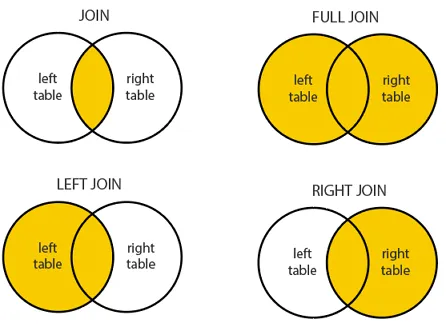

**Implementation**

In [ ]:
# Creating two DataFrames
df1 = spark.createDataFrame([(1, 'Amay'), (2, 'Bobby'), (3, 'Charu')], ['id', 'name'])
print('df1')
df1.show()

df2 = spark.createDataFrame([(1, 'New Delhi'), (2, 'Punjab'), (4, 'Haryana')], ['id', 'city'])
print('df2')
df2.show()

# Inner join example
inner_join = df1.join(df2, on='id', how='inner')
print('INNER JOIN')
inner_join.show()

# Right join example
right_join = df1.join(df2, on='id', how='right')
print('RIGHT JOIN')
right_join.show()

# Left join example
left_join = df1.join(df2, on='id', how='left')
print('LEFT JOIN')
left_join.show()

# Full outer join example
full_outer_join = df1.join(df2, on='id', how='outer')
print('FULL OUTER JOIN')
full_outer_join.show()

'''leftsemi join is similar to inner join difference being leftsemi join
returns all columns from the left dataset and ignores all columns from
the right dataset.'''

# Left semi join example
left_semi_join = df1.join(df2, on='id', how='leftsemi')
print('LEFT SEMI JOIN')
left_semi_join.show()

'''leftanti join does the exact opposite of the leftsemi, leftanti join returns
only columns from the left dataset for non-matched records.'''

# Left anti join example
left_anti_join = df1.join(df2, on='id', how='leftanti')
print('LEFT ANTI JOIN')
left_anti_join.show()

'''This join simply combines each row of the first table with each row
 of the second table'''

# cross join example
cross_join = df1.crossJoin(df2)
print('CROSS JOIN')
cross_join.show()




df1
+---+-----+
| id| name|
+---+-----+
|  1| Amay|
|  2|Bobby|
|  3|Charu|
+---+-----+

df2
+---+---------+
| id|     city|
+---+---------+
|  1|New Delhi|
|  2|   Punjab|
|  4|  Haryana|
+---+---------+

INNER JOIN
+---+-----+---------+
| id| name|     city|
+---+-----+---------+
|  1| Amay|New Delhi|
|  2|Bobby|   Punjab|
+---+-----+---------+

RIGHT JOIN
+---+-----+---------+
| id| name|     city|
+---+-----+---------+
|  1| Amay|New Delhi|
|  2|Bobby|   Punjab|
|  4| null|  Haryana|
+---+-----+---------+

LEFT JOIN
+---+-----+---------+
| id| name|     city|
+---+-----+---------+
|  1| Amay|New Delhi|
|  3|Charu|     null|
|  2|Bobby|   Punjab|
+---+-----+---------+

FULL OUTER JOIN
+---+-----+---------+
| id| name|     city|
+---+-----+---------+
|  1| Amay|New Delhi|
|  2|Bobby|   Punjab|
|  3|Charu|     null|
|  4| null|  Haryana|
+---+-----+---------+

LEFT SEMI JOIN
+---+-----+
| id| name|
+---+-----+
|  1| Amay|
|  2|Bobby|
+---+-----+

LEFT ANTI JOIN
+---+-----+
| id| name|

**TASK**

Data :

df1 = spark.createDataFrame([(23, 'Aarav'), (42, 'Daisy'), (37, 'Avi'),(43, 'Abir'),(11, 'Raghav'),(19, 'Nitara')], ['roll_no', 'student_name'])
print('df1')
df1.show()

df2 = spark.createDataFrame([(42, 'English'), (37, 'Maths'), (19, 'Computer Science'),(8, 'Sociology'),(16, 'IT'),(23, 'Hindi')], ['roll_no', 'Sanskrit'])
print('df2')
df2.show()

- Perform inner, right, left, cross, left semi, left anti, outer join on the given datasets.

2.  **Text Split:**

   - Explanation: Text split is used to split a column into multiple columns based on a delimiter.It  is used to split a string column into an array of substrings based on a delimiter.

   - Syntax: `split(column, delimiter)`

   delimiter is the character or string used to split the column

   - Usage: Useful when you want to extract specific parts from a column containing text.

   Code Example:
   ```python
   df = df.withColumn('new_column', split(df['text_column'], ','))
   ```

   - Task:
     Split a column named `name` into two columns: `first_name` and `last_name`.


In [ ]:
from pyspark.sql.functions import split

df = spark.createDataFrame([(1, 'Amay Gupta'), (2, 'Deepak Kaushik'), (3, 'Charu Ahuja')], ['id', 'name'])

print('Original df')
df.show()

df_split = df.withColumn('first_name', split(df['name'], ' ')[0])\
.withColumn('last_name', split(df['name'], ' ')[1])

print('After split')
df_split.show()

Original df
+---+--------------+
| id|          name|
+---+--------------+
|  1|    Amay Gupta|
|  2|Deepak Kaushik|
|  3|   Charu Ahuja|
+---+--------------+

After split
+---+--------------+----------+---------+
| id|          name|first_name|last_name|
+---+--------------+----------+---------+
|  1|    Amay Gupta|      Amay|    Gupta|
|  2|Deepak Kaushik|    Deepak|  Kaushik|
|  3|   Charu Ahuja|     Charu|    Ahuja|
+---+--------------+----------+---------+



**Task**
Create a dataframe with 2 rows and 1 column(city,state) and split it into 2 columns city and state.

3. Text Length:
- Explanation: The length function is used to calculate the length of a string column.

- Syntax:
```length_col = F.length(column_name)```

- Usage: column_name is the name of the column for which the length is calculated.


In [ ]:
from pyspark.sql import functions as F

# Creating a DataFrame with a string column
df = spark.createDataFrame([('Hello, World!',)], ['message'])


# Calculating the length of the message column
length_col = F.length(df['message'])
df.withColumn('message_length', length_col).show()


+-------------+--------------+
|      message|message_length|
+-------------+--------------+
|Hello, World!|            13|
+-------------+--------------+



4. Regex Replace::
- Explanation: The regexp_replace function is used to replace substrings in a string column based on a regular expression pattern.

- Syntax:
```replaced_col = F.regexp_replace(column_name, pattern, replacement)```

- column_name is the name of the column to search and replace.
- pattern is the regular expression pattern to search for.
- replacement is the string to replace the matching pattern with.



In [ ]:
from pyspark.sql.functions import regexp_replace

# Creating a DataFrame
school = [(1,"DPS","Karol bagh"),
    (2,"BBPS","Pitampura"),
    (3,"DAV","Mandir marg")]
df =spark.createDataFrame(school,["id","School","Address"])
df.show()


#Replace part of string with another string
df.withColumn('school', regexp_replace('school', 'DPS', 'Delhi Public School')) \
  .show()



+---+------+-----------+
| id|School|    Address|
+---+------+-----------+
|  1|   DPS| Karol bagh|
|  2|  BBPS|  Pitampura|
|  3|   DAV|Mandir marg|
+---+------+-----------+

+---+-------------------+-----------+
| id|             school|    Address|
+---+-------------------+-----------+
|  1|Delhi Public School| Karol bagh|
|  2|               BBPS|  Pitampura|
|  3|                DAV|Mandir marg|
+---+-------------------+-----------+

+---+------+-----------+
| id|school|    Address|
+---+------+-----------+
|  1|   DPS| Karol bagh|
|  2|  BBPS|  Pitampura|
|  3|   DAV|Mandir marg|
+---+------+-----------+



5. Remove whitespaces/ MoveSpace:
- Explanation: The trim function is used to remove leading and trailing whitespace from a string column.

```trimmed_col = F.trim(column_name)```


In [ ]:
from pyspark.sql import functions as F

# Creating a DataFrame with a string column
data=[('     Hello, World!    ',)]
df = spark.createDataFrame(data, ['message'])
df.show()

# Removing leading and trailing whitespace from the message column
trimmed_col = F.trim(df['message'])
df.withColumn('trimmed_message', trimmed_col).show()


+--------------------+
|             message|
+--------------------+
|     Hello, World...|
+--------------------+

+--------------------+---------------+
|             message|trimmed_message|
+--------------------+---------------+
|     Hello, World...|  Hello, World!|
+--------------------+---------------+



Try ltrim() and rtrim() on your own.

6. Casting:
- Explanation: The cast function is used to convert a column to a different data type.

- Syntax:
```cast_col = column_name.cast(data_type)```

- Usage:
column_name is the name of the column to cast.
data_type is the desired data type to convert the column to.

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType

# Creating a DataFrame with a string column
df = spark.createDataFrame([('42',)], ['number'])
print('Before casting')
df.printSchema()
df.show()

# Casting the number column to integer type
df=df.withColumn('number',df.number.cast(IntegerType()))
print('After casting')
df.show()
df.printSchema()


Before casting
root
 |-- number: string (nullable = true)

+------+
|number|
+------+
|    42|
+------+

After casting
+------+
|number|
+------+
|    42|
+------+

root
 |-- number: integer (nullable = true)



7. to_date:
- Explanation:

to_date() function is used to convert String to Date format of a DataFrame column.

to_date() – function is used to format string (StringType) to date (DateType) column.

- Syntax
to_date(column,format)
Example: to_date(col("string_column"),"MM-dd-yyyy")

- Usage:

This function takes the first argument as a date string and the second argument takes the pattern the date is in the first argument.



In [ ]:
from pyspark.sql.functions import *

df=spark.createDataFrame([["02-03-2013"],["05-06-2023"]],["input"])
df.printSchema()

df= df.select(col("input"),to_date(col("input"),"MM-dd-yyyy").alias("date"))
df.show()
df.printSchema()


df1=spark.createDataFrame(
        data = [ ("1","2019-06-24 12:01:19.000")],
        schema=["id","input_timestamp"])
df1.show()
df1.printSchema()

#Timestamp String to DateType
df1.withColumn("date_type",to_date("input_timestamp")) \
  .show()

#Timestamp Type to DateType
df1.withColumn("today's date",to_date(current_timestamp())) \
  .show()


root
 |-- input: string (nullable = true)

+----------+----------+
|     input|      date|
+----------+----------+
|02-03-2013|2013-02-03|
|05-06-2023|2023-05-06|
+----------+----------+

root
 |-- input: string (nullable = true)
 |-- date: date (nullable = true)

+---+--------------------+
| id|     input_timestamp|
+---+--------------------+
|  1|2019-06-24 12:01:...|
+---+--------------------+

root
 |-- id: string (nullable = true)
 |-- input_timestamp: string (nullable = true)

+---+--------------------+----------+
| id|     input_timestamp| date_type|
+---+--------------------+----------+
|  1|2019-06-24 12:01:...|2019-06-24|
+---+--------------------+----------+

+---+--------------------+------------+
| id|     input_timestamp|today's date|
+---+--------------------+------------+
|  1|2019-06-24 12:01:...|  2023-06-21|
+---+--------------------+------------+



8. Concatenation of Two Columns:
- Explanation: Concatenation is used to combine two or more columns into a single column.
-  Syntax: `concat(column1, column2, ...)`
-  Usage: Useful when you need to merge the values of multiple columns into one.

```   df = df.withColumn('new_column', concat(df['column1'], df['column2']))```

In [ ]:
from pyspark.sql.functions import concat,col
data = [('James','','Smith','1991-04-01','M',3000),
  ('Michael','Rose','','2000-05-19','M',4000),
  ('Robert','','Williams','1978-09-05','M',4000),
  ('Maria','Anne','Jones','1967-12-01','F',4000),
  ('Jen','Mary','Brown','1980-02-17','F',-1)
]

columns = ["firstname","middlename","lastname","dob","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)
print('Original df')
df.show()

df2=df.select(concat(df.firstname,df.middlename,df.lastname)
              .alias("FullName"),"dob","gender","salary")
df2.show()

df3=df.select(concat_ws('_',df.firstname,df.middlename,df.lastname)
              .alias("FullName"),"dob","gender","salary")
df3.show()

# concat_ws('delimiter',df.col_name1,df.col_name2).alias('new_col_name')

Original df
+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|       dob|gender|salary|
+---------+----------+--------+----------+------+------+
|    James|          |   Smith|1991-04-01|     M|  3000|
|  Michael|      Rose|        |2000-05-19|     M|  4000|
|   Robert|          |Williams|1978-09-05|     M|  4000|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|
+---------+----------+--------+----------+------+------+

+--------------+----------+------+------+
|      FullName|       dob|gender|salary|
+--------------+----------+------+------+
|    JamesSmith|1991-04-01|     M|  3000|
|   MichaelRose|2000-05-19|     M|  4000|
|RobertWilliams|1978-09-05|     M|  4000|
|MariaAnneJones|1967-12-01|     F|  4000|
|  JenMaryBrown|1980-02-17|     F|    -1|
+--------------+----------+------+------+

+----------------+----------+------+------+
|        FullName|       dob|gender|salary|
+------

**PySpark string functions you need to practice are as given below with their explanation and syntax:**


*   contains() - It checks whether a string column contains a specified substring or not.

```df.filter(col('column_name').contains('substring'))```

*   startswith() - It checks whether a string column starts with a specified substring or not.

```df.filter(col('column_name').startswith('substring'))```

* endswith()- It checks whether a string column ends with a specified substring or not.

```df.filter(col('column_name').endswith('substring'))```

*  initcap() - It converts the first letter of each word in a string column to uppercase.

```df.select(initcap(df.column_name))```

* upper() - It converts a string column to uppercase.

```df.select(upper(df.column_name))```

* lower() - It converts a string column to lowercase.

```df.select(lower(df.column_name))```

* substring() - It extracts a substring from a string column based on a starting position and length.

```df.select(substring('column_name', position, length))```

* lpad()- It pads a string column on the left with a specified character to a specified length.

```df.select(lpad('column_name', length, 'character'))```

* rpad()- It pads a string column on the right with a specified character to a specified length.

```df.select(rpad(df.column_name, length, 'character'))```

* ltrim() - It removes leading whitespace from a string column.

```df.select(ltrim(df.column_name))```

* rtrim() - It removes trailing whitespace from a string column.

```df.select(rtrim(df.column_name))```




# DAY 4

**SQL**

Spark SQL -  It provides a programming interface for querying structured and semi-structured data using SQL-like syntax. It allows developers to seamlessly integrate SQL queries with their Spark applications.

- To create a view from a DataFrame, you can use the createOrReplaceTempView() method. It creates a temporary view that is accessible only within the current SparkSession.

```df.createOrReplaceTempView("view_name")```

- Once you have created a view, you can run SQL queries on it using the spark.sql() method.

- select query

```spark.sql("SELECT * FROM view_name")```



Let's consider a scenario where we have a dataset of employees and their respective departments. We will create a DataFrame, register it as a temporary view, and perform SQL queries using Spark SQL.

- CREATE TABLE COMPANY(
   ID INT PRIMARY KEY     NOT NULL,
   NAME           TEXT    NOT NULL,
   AGE            INT     NOT NULL,
   ADDRESS        CHAR(50),
   SALARY         REAL,
   JOIN_DATE	  DATE
);


- INSERT INTO COMPANY (ID,NAME,AGE,ADDRESS,SALARY,JOIN_DATE) VALUES (1, 'Amay', 32, 'New Delhi', 20000.00,'2022-07-13')
,(2, 'Akshay', 22, 'Uttar Pradesh', 40000.00,'2023-09-18')
,(3, 'Nishtha', 21, 'Haryana', 50000.00,'2021-11-28')
,(4, 'Nysha', 18, 'New Delhi', 20000.00,'2022-07-13');


- SELECT id, name, age, address, salary, join_date FROM public.company;

In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("SQL") \
    .getOrCreate()

# Create a DataFrame from a list of tuples
data = [("Amay", "Engineering", 5000),
        ("Bhawna", "Sales", 3000),
        ("Charu", "Engineering", 4500),
        ("Daisy", "Sales", 3500)]

df = spark.createDataFrame(data, ["Name", "Department", "Salary"])
print('Original df')
df.show()

# Register the DataFrame as a temporary view
df.createOrReplaceTempView("employees")

# Run SQL queries on the view

print('After running select query ')
spark.sql("SELECT * FROM employees").show()

result = spark.sql("SELECT * FROM employees WHERE Salary > 4000")
print('On running SQL query with salary > 4000 condition')
result.show()


Original df
+------+-----------+------+
|  Name| Department|Salary|
+------+-----------+------+
|  Amay|Engineering|  5000|
|Bhawna|      Sales|  3000|
| Charu|Engineering|  4500|
| Daisy|      Sales|  3500|
+------+-----------+------+

After running select query 
+------+-----------+------+
|  Name| Department|Salary|
+------+-----------+------+
|  Amay|Engineering|  5000|
|Bhawna|      Sales|  3000|
| Charu|Engineering|  4500|
| Daisy|      Sales|  3500|
+------+-----------+------+

On running SQL query with salary > 4000 condition
+-----+-----------+------+
| Name| Department|Salary|
+-----+-----------+------+
| Amay|Engineering|  5000|
|Charu|Engineering|  4500|
+-----+-----------+------+



- Using groupBy query:


In [ ]:
print('After Group by query ')
result = spark.sql("SELECT Department, AVG(Salary) FROM employees GROUP BY Department")
result.show()

result = spark.sql("SELECT Department, AVG(Salary) FROM employees GROUP BY Department")
result.show()

resul= spark.sql("SELECT Department, COUNT(Salary) FROM employees GROUP BY Department")
resul.show()

After Group by query 
+-----------+-----------+
| Department|avg(Salary)|
+-----------+-----------+
|      Sales|     3250.0|
|Engineering|     4750.0|
+-----------+-----------+

+-----------+-----------+
| Department|avg(Salary)|
+-----------+-----------+
|      Sales|     3250.0|
|Engineering|     4750.0|
+-----------+-----------+

+-----------+-------------+
| Department|count(Salary)|
+-----------+-------------+
|      Sales|            2|
|Engineering|            2|
+-----------+-------------+



Performing Joins:
- Spark SQL supports different types of joins, such as inner join, outer join, left join, right join, etc.

In [ ]:
df1 = spark.createDataFrame([(1, 'Amay'), (2, 'Bobby'), (3, 'Charu')], ['id', 'name'])
print('df1')
df1.show()

df2 = spark.createDataFrame([(1, 'New Delhi'), (2, 'Punjab'), (4, 'Haryana')], ['id', 'city'])
print('df2')
df2.show()

df1.createOrReplaceTempView("left_table")
df2.createOrReplaceTempView("right_table")

result = spark.sql("SELECT * FROM left_table INNER JOIN right_table ON left_table.id = right_table.id")
print('After join')
result.show()




df1
+---+-----+
| id| name|
+---+-----+
|  1| Amay|
|  2|Bobby|
|  3|Charu|
+---+-----+

df2
+---+---------+
| id|     city|
+---+---------+
|  1|New Delhi|
|  2|   Punjab|
|  4|  Haryana|
+---+---------+

After join
+---+-----+---+---------+
| id| name| id|     city|
+---+-----+---+---------+
|  1| Amay|  1|New Delhi|
|  2|Bobby|  2|   Punjab|
+---+-----+---+---------+



Task:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

data1 = [
    ("1", "Rahul", "Kumar", "Delhi"),
    ("2", "Priya", "Sharma", "Mumbai"),
    ("3", "Amit", "Verma", "Kolkata"),
    ("4", "Sneha", "Gupta", "Chennai"),
    ("5", "Vikram", "Singh", "Bangalore"),
    ("6", "Neha", "Patel", "Hyderabad"),
    ("7", "Rajesh", "Yadav", "Pune"),
    ("8", "Sara", "Malhotra", "Jaipur"),
    ("9", "Rakesh", "Shah", "Ahmedabad"),
    ("10", "Anita", "Rao", "Chandigarh")
]

df1 = spark.createDataFrame(data1, ["id", "first_name", "last_name", "city"])
df1.show()

data2 = [
    ("1", "Rahul", "Kumar", "IT"),
    ("2", "Priya", "Sharma", "Finance"),
    ("3", "Amit", "Verma", "Marketing"),
    ("4", "Sneha", "Gupta", "HR"),
    ("5", "Vikram", "Singh", "IT"),
    ("6", "Neha", "Patel", "Finance"),
    ("7", "Rajesh", "Yadav", "Marketing"),
    ("8", "Sara", "Malhotra", "HR"),
    ("9", "Rakesh", "Shah", "IT"),
    ("10", "Anita", "Rao", "Finance")
]

df2 = spark.createDataFrame(data2, ["id", "first_name", "last_name", "department"])
df2.show()

Perform select, group by , where and join query on it.

Connecting PySpark with PostgreSQL:

- PySpark provides support for connecting to external databases like PostgreSQL to read data from tables and write data back to tables. By establishing a connection, you can leverage the power of PySpark's distributed processing capabilities on your PostgreSQL data.

- To connect PySpark with PostgreSQL, you need to provide the necessary configurations.

1. Connecting PySpark with PostgreSQL:
- To connect PySpark with PostgreSQL, you need to provide the appropriate JDBC URL, along with the username and password. Ensure that you have the PostgreSQL JDBC driver (JAR file) available and specified in the SparkSession configuration. Replace the placeholders in the code example with the actual connection details.

2. Reading a Table from PostgreSQL:
- To read a table from PostgreSQL, use the read.jdbc() method and specify the JDBC URL, table name, and connection properties (username and password). This will create a DataFrame containing the data from the specified table.

3. Writing a Table to PostgreSQL:
- To write a DataFrame to a PostgreSQL table, use the write.jdbc() method and specify the JDBC URL, table name, mode (e.g., "append" or "overwrite"), and connection properties. This will write the DataFrame data to the specified table in the PostgreSQL database.

- Note: Ensure that you have the necessary access rights and privileges to the PostgreSQL database and tables for successful read and write operations.

SYNTAX

In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("PostgreSQLExample") \
    .config("spark.jars", "/path/to/postgresql.jar") \
    .getOrCreate()

# Establish a connection to PostgreSQL
url = "jdbc:postgresql://hostname:port/database"
properties = {
    "user": "username",
    "password": "password"
}

# Read data from a PostgreSQL table
df = spark.read.jdbc(url=url, table="table_name", properties=properties)

# Write data to a PostgreSQL table
df.write.jdbc(url=url, table="table_name", mode="append", properties=properties)


CODE :

In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("PostgreSQLExample") \
    .config("spark.jars", "/path/to/postgresql.jar") \
    .getOrCreate()

# Establish a connection to PostgreSQL
url = "jdbc:postgresql://localhost:5432/mydatabase"
properties = {
    "user": "myusername",
    "password": "mypassword"
}

# Read data from a PostgreSQL table
df = spark.read.jdbc(url=url, table="source_table", properties=properties)

# Perform transformations on the DataFrame
transformed_df = df.filter(df["age"] > 30).select("name", "age")

# Write data to a PostgreSQL table
transformed_df.write.jdbc(url=url, table="target_table", mode="append", properties=properties)


* INCREMENTAL LOADING

- Incremental loading is a technique used in Extract, Transform, Load (ETL) projects to update a target dataset with only the new or changed data since the last load.

- Instead of reloading the entire dataset, incremental loading focuses on processing and appending the delta or changes to the existing dataset, thereby reducing processing time and resource usage.

- It is useful when dealing with large datasets or scenarios where data is continuously updated. By identifying and processing only the incremental changes, the ETL process becomes more efficient and faster.


**Syntax**

The general approach involves comparing timestamps or other indicators to identify new or changed data

- Loading Existing Data:
Load the existing data from the target dataset using the appropriate method, such as spark.read.parquet(), to read the data from an existing Parquet file.

- Loading New Data:
Load the new data from the source system, such as a database table, using the appropriate method, such as spark.read.jdbc(), to fetch the data.

- Identifying Incremental Changes:
Filter the new data based on the desired condition (e.g., data that is newer than a specific date or timestamp) to identify the incremental changes.

- Combining Data:
Combine the existing data with the incremental data using DataFrame operations like union() to create a new DataFrame that contains both datasets.

- Writing to Parquet:
Write the combined data to a new Parquet file using the write.mode("overwrite").parquet() method, specifying the desired save location and file format.

In [ ]:
# Load existing data
existing_data = spark.read.parquet("existing_data.parquet")

# Load new data
new_data = spark.read.jdbc(url=url, table="source_table", properties=properties)

# Identify the incremental changes
incremental_data = new_data.filter(new_data["date"] >= start_date)

# Combine existing and incremental data
combined_data = existing_data.union(incremental_data)

# Write the combined data to a new Parquet file
combined_data.write.mode("overwrite").parquet("updated_data.parquet")


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Load existing data
existing_data = spark.read.csv("/content/drive/MyDrive/Sample_Data/inventory.csv",header=True,inferSchema=True)
existing_data.show()
print('COUNT ',existing_data.count())


# new_data= spark.read.csv("/content/drive/MyDrive/Sample_Data/Inventory_2.csv",header=True,inferSchema=True)
# print('COUNT ',new_data.count())
# new_data.show()

# incremental_data = new_data.filter(new_data["PostingDate"] >= '2023-05-01')

+--------+--------+-------------------+---------+--------------+------------+--------+-----------+----------+-----------+---------------+---------+----------+---------------------+
|EntryNo_| ItemNo_|        PostingDate|EntryType|   DocumentNo_|LocationCode|Quantity|VariantCode| SerialNo_|QuantityLCY|LinkDocumentNo_|YearMonth|DocumentNo|last_day(PostingDate)|
+--------+--------+-------------------+---------+--------------+------------+--------+-----------+----------+-----------+---------------+---------+----------+---------------------+
| 3250000|IT002333|2020-04-30 00:00:00|        1|DC6202021-0013|     CHN-TRA|    -1.0| 864279-B21|F200-CMD19|       -1.0| DC6202021-0013|    20204|      null|  2020-04-30 00:00:00|
| 3250000|IT002333|2020-04-30 00:00:00|        1|DC6202021-0013|     CHN-TRA|    -1.0| 864279-B21|F200-CMD19|       -1.0| DC6202021-0013|    20204|      null|  2019-09-30 00:00:00|
| 3250000|IT002333|2020-04-30 00:00:00|        1|DC6202021-0013|     CHN-TRA|    -1.0| 864279-B

# DAY 5

- Hands-on :
1. PostgreSQL and pyspark connectivity
2. MSSQL and pyspark connectivity

1. PostgreSQL and pyspark connectivity

In [ ]:
import pyspark
from google.colab import drive
drive.mount('/content/drive')

from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("PostgreSQL JDBC Connection") \
    .config("spark.driver.extraClassPath", "content/drive/MyDrive/Colab Notebooks/postgresql-42.6.0.jar") \
    .getOrCreate()


Mounted at /content/drive


In [ ]:
class PostgresDbInfo:
    Host = "host_name"
    Port = "5432"
    PostgresDB = "db_name"
    PostgresUrl = "jdbc:postgresql://" + Host + "/" + PostgresDB
    props = {"user":"user", "password":"password", "driver": "org.postgresql.Driver"}

Query="(SELECT * from Access Control) as df"

postgres_df = spark.read.format("jdbc").options(url=PostgresDbInfo.PostgresUrl, dbtable=Query,user=PostgresDbInfo.props["user"],password=PostgresDbInfo.props["password"],driver= PostgresDbInfo.props["driver"]).load()
postgres_df.show()



2. MSSQL and pyspark connectivity

In [ ]:
import pyspark
from google.colab import drive
drive.mount('/content/drive')

from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("MSSQL JDBC Connection") \
    .config("spark.driver.extraClassPath", "/content/drive/MyDrive/Colab Notebooks/mssql-jdbc-12.2.0.jre8.jar") \
    .getOrCreate()

Mounted at /content/drive


In [ ]:
class ConnectionInfo:
    JDBC_PARAM = "jdbc"
    SQL_SERVER_DRIVER = "com.microsoft.sqlserver.jdbc.SQLServerDriver"
    SQL_URL="jdbc:sqlserver://4.240.11.180:1433;databaseName=Parijat;user=SparkTraining;password=SparkTraining@123;encrypt=true;trustServerCertificate=true"


query = "(SELECT * from [Student_incremental]) as data"
viewDF = spark.read.format(ConnectionInfo.JDBC_PARAM).options(url=ConnectionInfo.SQL_URL,dbtable=query,driver=ConnectionInfo.SQL_SERVER_DRIVER).load()
viewDF.show()

+---+----------------+-------------------+-----------+---+
| ID|            Name|             InDtTm|       Date|Age|
+---+----------------+-------------------+-----------+---+
|  1|   ABHISHEK 1234|2023-05-16 12:08:47|2023-03-30 | 26|
|  2|   AMIT kumar 32|2023-05-29 13:51:46|2023-03-31 | 24|
|  3|naveen gulati 32|2023-05-29 13:51:46|2023-03-01 | 25|
|  4|            hary|2023-05-16 15:19:26|2023-03-02 | 27|
|  5|           mansu|2023-05-16 12:44:08|2023-03-03 | 28|
|  6|           sagar|2023-05-15 14:15:28|2023-03-04 | 21|
|  7|          satyam|2023-05-15 14:15:28|2023-06-05 | 22|
|  8|           ayush|2023-05-15 14:15:28|2023-06-06 | 27|
|  9|          akshay|2023-05-15 14:15:28|2023-06-07 | 28|
| 10|           dhruv|2023-05-15 14:15:28|2023-06-08 | 29|
| 11|          ankush|2023-05-15 14:15:28|2023-06-09 | 20|
| 12|         abhinav|2023-05-15 14:15:28|2023-06-10 | 23|
| 13|          mayank|2023-05-15 14:15:28|2023-03-29 | 19|
| 14|           hruva|2023-05-15 14:15:28|2023-03-28 | 1

**Task 1**

- Read the data from the shared csv file.
- Write it to the SQL database.


**Task 2**

- Add some rows to the table in SQL using SQL commands.
- Now Read the table from SQL database and check the updated data.


**Task 3**

- Create 2 dataframes on your own having difference in columns and merge them.

**Task 4**

1. Use Case1 : Create a SparkSession and Load Data

- Create a SparkSession named "SparkSessionAssignment".
- Load a CSV file named "data.csv" into a DataFrame named "df".

2. Use Case: Select Columns

- Select and display only the "name" and "age" columns from the DataFrame.

3. Use Case: Add a New Column

- Add a new column named "age_plus_5" that contains the age increased by 5 for each row.

4. Use Case: Rename Columns

- Rename the "age" column to "age_years" in the DataFrame.

5. Use Case: Filter Data

- Filter the DataFrame to include only rows where the age is greater than 30.

6. Use Case: Group By and Aggregation

- Group the DataFrame by the "city" column and calculate the average age for each city.

7. Use Case: Order By

- Sort the DataFrame in descending order based on the "age_years" column.

8. Use Case: Join DataFrames

- Create a second DataFrame named "df2" from a CSV file named "data2.csv" with columns "name" and "occupation".

- Join(left) "df" and "df2" on the "name" column and display the result.

9. Use Case: Pivot Table

- Create a pivot table from the DataFrame, with "city" as the index, "occupation" as the columns, and the average age as the values.

name,age,city
John,25,New York
Alice,30,San Francisco
Bob,35,New York
Charlie,40,Los Angeles

name,occupation
John,Engineer
Alice,Manager
Bob,Analyst
Charlie,Developer

In [ ]:
name,age,city
John,25,New York
Alice,30,San Francisco
Bob,35,New York
Charlie,40,Los Angeles


In [ ]:
name,occupation
John,Engineer
Alice,Manager
Bob,Analyst
Charlie,Developer


In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("SparkSessionAssignment").getOrCreate()

# Use Case 1: Load Data
df = spark.read.csv("data.csv", header=True, inferSchema=True)

# Use Case 2: Select Columns
df.select("name", "age").show()

# Use Case 3: Add a New Column
df = df.withColumn("age_plus_5", df["age"] + 5)

# Use Case 4: Rename Columns
df = df.withColumnRenamed("age", "age_years")

# Use Case 5: Filter Data
filtered_df = df.filter(df["age_years"] > 30)

# Use Case 6: Group By and Aggregation
grouped_df = df.groupBy("city").avg("age_years")

# Use Case 7: Order By
sorted_df = df.orderBy(df["age_years"].desc())

# Use Case 8: Join DataFrames
df2 = spark.read.csv("data2.csv", header=True, inferSchema=True)
joined_df = df.join(df2, "name","left")

# Use Case 9: Pivot Table
pivot_df = df.groupBy("city").pivot("occupation").avg("age_years")

# Display the results
filtered_df.show()
grouped_df.show()
sorted_df.show()
joined_df.show()
pivot_df.show()

# Stop the SparkSession
spark.stop()


# DAY 6

**Parquet File**
- Parquet is a columnar storage file format that is optimized for big data processing.

- It provides efficient compression and encoding schemes, allowing for fast data access and column pruning.

- Parquet files are designed to be highly efficient for both reading and writing large datasets.

**Syntax**

- To read a Parquet file, you can use the following syntax in different programming languages:


In [ ]:
from pyspark.sql import SparkSession
import os

# if os.path.exists("/content/drive/MyDrive/Sample_Data/practice_file.parquet"):
#   print("yes")
# else:
#   print("no")

# fs = sc._jvm.org.apache.hadoop.fs.FileSystem.get(sc._jsc.hadoopConfiguration())

#     if fs.exists(sc._jvm.org.apache.hadoop.fs.Path("destination"))

# Create SparkSession
spark = SparkSession.builder.getOrCreate()

# Read Parquet file
df = spark.read.parquet("/content/drive/MyDrive/Sample_Data/practice_file.parquet")

# Show the contents of the DataFrame
df.show()


yes
+---------+----------+--------+-----+------+------+------------+
|firstname|middlename|lastname|   id|gender|salary|firstnameLen|
+---------+----------+--------+-----+------+------+------------+
|   naveen|          |Williams|42114|     M|  4000|           6|
|    mansi|      Anne|   Jones|39192|     F|  4000|           5|
|   harish|      Mary|   Brown|     |     F|    -1|           6|
+---------+----------+--------+-----+------+------+------------+



- How to read CSV files and save them as Parquet files using 'append' and 'overwrite' mode  in PySpark:

In [ ]:
# Read CSV file
df_csv = spark.read.csv("path/to/csv_file.csv", header=True, inferSchema=True)

# Write DataFrame to Parquet file (Overwrite mode)
df_csv.write.mode("overwrite").parquet("path/to/output_file.parquet")

# Write DataFrame to Parquet file (Append mode)
df_csv.write.mode("append").parquet("path/to/output_file.parquet")


 - Parquet files store data in a compressed and columnar format, which allows for better compression ratios and faster query performance compared to row-based file formats like CSV.

Parquet: The standard Parquet file format.
- **Parquet with Snappy compression:** Parquet file format with Snappy compression applied to reduce the file size.

- **Parquet with Avro schema:** Parquet file format that includes an Avro schema for better data interoperability.

**Compression techniques in Parquet files:**

- PySpark supports various compression codecs, including Snappy and Avro. You can specify the compression codec when writing Parquet files
(A codec takes data in one form, encodes it into another form and decodes it).



In [ ]:
# Write DataFrame to Parquet file with Snappy compression (Overwrite mode)
df_csv.write.mode("overwrite").option("compression", "snappy").parquet("path/to/output_file.parquet")

# Write DataFrame to Parquet file with Avro schema and Snappy compression (Overwrite mode)
df_csv.write.mode("overwrite").option("compression", "snappy").option("avroSchema", "true").parquet("path/to/output_file.parquet")


**Partioning**

- PySpark partition is a way to split a large dataset into smaller datasets based on one or more partition keys.

- When you create a DataFrame from a file/table, based on certain parameters PySpark creates the DataFrame with a certain number of partitions in memory. This is one of the main advantages of PySpark DataFrame over Pandas DataFrame.

- Transformations on partitioned data run faster as they execute transformations parallelly for each partition.

- PySpark supports partition in two ways; partition in memory (DataFrame) and partition on the disk (File system).

- **Partition in memory**: You can partition or repartition the DataFrame by calling repartition() or coalesce() transformations.

- **Partition on disk**: While writing the PySpark DataFrame back to disk, you can choose how to partition the data based on columns using partitionBy() of pyspark.sql.DataFrameWriter.


**PySpark partitionBy()** is a function of ```pyspark.sql.DataFrameWriter``` class which is used to partition based on column values while writing DataFrame to Disk/File system.

In [ ]:
Syntax: partitionBy(self, *cols)


In [ ]:

#partitionBy() multiple columns
df.write.option("header",True) \
        .partitionBy("col1") \
        .mode("overwrite") \
        .csv("path")


It creates a folder hierarchy for each partition; we have mentioned the first partition as ```col1``` followed by ```col2``` hence, it creates a col2 folder inside the col1 folder (one folder for each col2 in a col1).

**maxRecordsPerFile**:

- Use option maxRecordsPerFile if you want to control the number of records for each partition. This is particularly helpful when your data is skewed (Having some partitions with very low records and other partitions with high number of records).


In [ ]:
#partitionBy() control number of partitions
df.write.option("header",True) \
        .option("maxRecordsPerFile", 2) \
        .partitionBy("column_name") \
        .mode("overwrite") \
        .csv("path")

The above example creates multiple part files for each column and each part file contains just 2 records.

**Read a Specific Partition**
- Reads are much faster on partitioned data. This code snippet retrieves the data from a specific partition "col1=A and col2=B". Here, It just reads the data from that specific folder instead of scanning a whole file (when not partitioned).

In [ ]:

df=spark.read.option("header",True) \
            .csv("c:/tmp/zipcodes-col1/col1=A/col2=B")
df.printSchema()
df.show()


**PySpark SQL – Read Partition Data**

In [ ]:
parqDF = spark.read.option("header",True) \
                  .csv("path")

parqDF.createOrReplaceTempView("view_name")
spark.sql("select * from view_name  where col1='A' and col2 = 'B'") \
    .show()

**Partitioning Parquet files on a monthly basis:**

In [ ]:
# Assuming you have a DataFrame named df with a date column named "date_column"

# Import functions
from pyspark.sql import functions as F

# Add a new column for the month (assuming the date column is of DateType)
df = df.withColumn("month", F.date_format(F.col("date_column"), "yyyy-MM"))

# Write DataFrame to Parquet files partitioned by month
df.write.partitionBy("month").parquet("path/to/output_directory.parquet")


**Using window functions and aggregate functions on Parquet files:**

- PySpark Window functions are used to calculate results such as the rank, row number etc over a range of input rows.

- It operates on a group of rows (like frame, partition) and return a single value for every input row.

In [ ]:
# Assuming you have a DataFrame named df

from pyspark.sql.window import Window
from pyspark.sql.functions import row_number, rank, dense_rank, min, max, sum, avg, countDistinct,lag,lead

Data = (("Kirti", "Sales", 3000), \
    ("Leo", "Sales", 4600),  \
    ("Neha", "Sales", 4100),   \
    ("Priya", "Finance", 3000),  \
    ("Pooja", "Sales", 3000),    \
    ("Anjali", "Finance", 3300),  \
    ("Kritika", "Finance", 3900),    \
    ("Megha", "Marketing", 3000), \
    ("Megha", "Marketing", 2000),\
    ("Shweta", "Sales", 4100) \
  )

columns= ["employee_name", "department", "salary"]

df = spark.createDataFrame(data = Data, schema = columns)

print("ORIGINAL DF")
df.show()

# Create a window specification
windowSpec = Window.partitionBy("department").orderBy("salary")
print("Using window function with order by")

# Example: Calculate row_number
# Returns a sequential number starting from 1 within a window partition
print("ROW NUMBER")
df.withColumn("row_number", row_number().over(windowSpec)).show()

# Example: Calculate rank
# Returns the rank of rows within a window partition.
# This function leaves gaps in rank when there are ties.
print("RANK")
df.withColumn("rank", rank().over(windowSpec)).show()

# Example: Calculate dense_rank
# Returns the rank of rows within a window partition without any gaps.
# Where as Rank() returns rank with gaps.
print("DENSE RANK")
df.withColumn("dense_rank", dense_rank().over(windowSpec)).show()

# Example: Calculate sum
print("SUM COLUMN")
df.withColumn("sum_column", sum("salary").over(windowSpec)).show()

# Example: Calculate min
print("MIN COLUMN")
df.withColumn("min_column", min("salary").over(windowSpec)).show()

# Example: Calculate max
print("MAX COLUMN")
df.withColumn("max_column", max("salary").over(windowSpec)).show()

# Example: Calculate average
print("AVG COLUMN")
df.withColumn("avg_column", avg("salary").over(windowSpec)).show()

# Example: Calculate lag
'''
lead() function where we access subsequent rows, but in lag function,
we access previous rows. It is a useful function in comparing
the current row value from the previous row value.
'''
print("LAG")
df.withColumn("lag",lag("salary",1,default=0).over(windowSpec)).show()

# Example: Calculate lead
print("LEAD")
df.withColumn("lead",lead("salary",1,default=0).over(windowSpec)).show()

# # Example: Calculate distinct count
# print("DISTINCT COUNT")
# df = df.withColumn("distinct_count", countDistinct("employee_name").over(windowSpec)).show()

# Show the DataFrame
# df.show()


ORIGINAL DF
+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|        Kirti|     Sales|  3000|
|          Leo|     Sales|  4600|
|         Neha|     Sales|  4100|
|        Priya|   Finance|  3000|
|        Pooja|     Sales|  3000|
|       Anjali|   Finance|  3300|
|      Kritika|   Finance|  3900|
|        Megha| Marketing|  3000|
|        Megha| Marketing|  2000|
|       Shweta|     Sales|  4100|
+-------------+----------+------+

Using window function with order by
ROW NUMBER
+-------------+----------+------+----------+
|employee_name|department|salary|row_number|
+-------------+----------+------+----------+
|        Priya|   Finance|  3000|         1|
|       Anjali|   Finance|  3300|         2|
|      Kritika|   Finance|  3900|         3|
|        Megha| Marketing|  2000|         1|
|        Megha| Marketing|  3000|         2|
|        Kirti|     Sales|  3000|         1|
|        Pooja|     Sales|  3000|         2|
|         Neha

# DAY 7

- Pyspark and MSSQL connect(connecting to azure db):

In [ ]:
import pyspark
from google.colab import drive
drive.mount('/content/drive')

from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("MSSQL JDBC Connection") \
    .config("spark.driver.extraClassPath", "/content/drive/MyDrive/Colab Notebooks/mssql-jdbc-12.2.0.jre8.jar") \
    .getOrCreate()

Mounted at /content/drive


In [ ]:
class ConnectionInfo:
    JDBC_PARAM = "jdbc"
    SQL_SERVER_DRIVER = "com.microsoft.sqlserver.jdbc.SQLServerDriver"
    SQL_URL="jdbc:sqlserver://4.240.11.180:1433;databaseName=Parijat;user=SparkTraining;password=SparkTraining@123;encrypt=true;trustServerCertificate=true"


query = "(SELECT * from [Student_incremental]) as data"
viewDF = spark.read.format(ConnectionInfo.JDBC_PARAM).options(url=ConnectionInfo.SQL_URL,dbtable=query,driver=ConnectionInfo.SQL_SERVER_DRIVER).load()
viewDF.show()

+---+----------------+-------------------+-----------+---+
| ID|            Name|             InDtTm|       Date|Age|
+---+----------------+-------------------+-----------+---+
|  1|   ABHISHEK 1234|2023-05-16 12:08:47|2023-03-30 | 26|
|  2|   AMIT kumar 32|2023-05-29 13:51:46|2023-03-31 | 24|
|  3|naveen gulati 32|2023-05-29 13:51:46|2023-03-01 | 25|
|  4|            hary|2023-05-16 15:19:26|2023-03-02 | 27|
|  5|           mansu|2023-05-16 12:44:08|2023-03-03 | 28|
|  6|           sagar|2023-05-15 14:15:28|2023-03-04 | 21|
|  7|          satyam|2023-05-15 14:15:28|2023-06-05 | 22|
|  8|           ayush|2023-05-15 14:15:28|2023-06-06 | 27|
|  9|          akshay|2023-05-15 14:15:28|2023-06-07 | 28|
| 10|           dhruv|2023-05-15 14:15:28|2023-06-08 | 29|
| 11|          ankush|2023-05-15 14:15:28|2023-06-09 | 20|
| 12|         abhinav|2023-05-15 14:15:28|2023-06-10 | 23|
| 13|          mayank|2023-05-15 14:15:28|2023-03-29 | 19|
| 14|           hruva|2023-05-15 14:15:28|2023-03-28 | 1

**Incremental Task**

1. Create a seperate notebook and give suitable name. Identify the table and columns for partitioning. Let's assume you have a table named "student_incremental" with a date column named "Date". Do full load of the data and create partitions on a monthly basis using (month and year from Date column).

2. Check whether the parquet files for the last two months (if the current date is June 2023, the last 2 months would be May 2023 and June 2023 till today)exist or not. if exist then overwrite the incremental data only.

3. Observe it if the incremental has performed completely or not. Also make sure that your code should be dynamic.


4. Share the link of the assignment on https://forms.gle/nMmUDtxeNzWHvxxe7


In [ ]:
import pyspark
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''Solution shared by one of the trainee. It can be optimized more. Approach may vary. '''

!pip install pymssql

from pyspark import SparkContext, SparkConf, SQLContext
from pyspark.sql import SparkSession
import sys,pymssql
from pyspark.sql import functions as f

# ------------------------------------exception handling ------------------------------------------------------------------------#
try:
    # ----------------------------creating the database connection--------------------------------------------------------------------#

    spark = SparkSession.builder \
      .appName("PostgreSQL JDBC Connection") \
      .config("spark.driver.extraClassPath", "/content/drive/MyDrive/Colab Notebooks/mssql-jdbc-12.2.0.jre8.jar") \
      .getOrCreate()
    # connection information to sql server
    class ConnectionInfo:
      JDBC_PARAM = "jdbc"
      SQL_SERVER_DRIVER = "com.microsoft.sqlserver.jdbc.SQLServerDriver"
      SQL_URL="jdbc:sqlserver://4.240.11.180:1433;databaseName=Parijat;user=SparkTraining;password=SparkTraining@123;encrypt=true;trustServerCertificate=true"

        # -------------------Getting the list of tables stored in database parijat and making the connection with SQL server-------------------------------------------------------#

    server="4.240.11.180"
    port="1433"
    database="Parijat"
    user="SparkTraining"
    password="SparkTraining@123"
    conn = pymssql.connect(server=server,port=port, user=user, password=password, database=database)

   '''PUT YOUR LOGIC OF CODE HERE'''


except Exception as e:
        exception_type, exception_object, exception_traceback = sys.exc_info()
        filename = exception_traceback.tb_frame.f_code.co_filename
        line_number = exception_traceback.tb_lineno
        print("Exception type: ", exception_type)
        print("File name: ", filename)
        print("Line number: ", line_number)

# Day 8

**Snapshotting**

- Snapshotting in PySpark depends on the specific requirements and data sources.

- The general steps involve loading the data into a DataFrame, applying a filter or transformation to create a snapshot, and then performing the desired analysis or operations on the snapshot DataFrame.



**Month-end snapshot of an AR(Account Receivables) module in PySpark:**


- Creates a SparkSession.
- Loads the AR transactions data from the source file into a DataFrame.
- Extracts the year and month from the transaction date using the year and month functions.
- Groups the transactions by customer, year, and month and calculates the month-end balance using the groupBy and agg functions.
- Uses the last_day function to determine the month-end date and aliases it as "snapshot_date" or "link_date".
- Calculates the sum of the transaction amounts and aliases it as "balance".
- Saves the resulting AR snapshot DataFrame to a target location, such as a csv file  using the write.csv function.
- Stop the SparkSession.


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, year, month, last_day, sum

# Create SparkSession
spark = SparkSession.builder .appName("ARModuleSnapshot").getOrCreate()

# Load AR transactions data from source)
arTransactions = spark.read.csv("path/to/ar_transactions.csv", header=True, inferSchema=True)

# Extract year and month from the transaction date
arTransactions = arTransactions.withColumn("year", year(col("transaction_date")))
arTransactions = arTransactions.withColumn("month", month(col("transaction_date")))

# Group by customer, year, and month and calculate the month-end balance
arSnapshot = arTransactions.groupBy("customer_id", "year", "month") \
    .agg(last_day(max("transaction_date")).alias("snapshot_date"), sum("amount").alias("balance"))

# Save the snapshot to a target location (e.g., a CSV file or database table)
arSnapshot.write.csv("path/to/ar_snapshot.csv", header=True)

# Stop the SparkSession
spark.stop()



Month-end snapshot of an inventory module in PySpark:


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, max, date_format
from pyspark.sql.window import Window

# Create SparkSession
spark = SparkSession.builder .appName("InventorySnapshot") .getOrCreate()

# Load inventory data from CSV file
inventory_df = spark.read.csv("inventory_data.csv", header=True, inferSchema=True)

# Convert date column to DateType
inventory_df = inventory_df.withColumn("date", col("date").cast("date"))

# Find the maximum date in the dataset
max_date = inventory_df.select(max("date")).collect()[0][0]

# Filter the data for the maximum date of each month
snapshot_df = inventory_df \
    .withColumn("year_month", date_format("date", "yyyy-MM")) \
    .withColumn("month_last_date", date_format(max_date, "yyyy-MM-dd")) \
    .filter(col("date") == col("month_last_date"))

# Create a window specification for partitioning by year and month
window_spec = Window.partitionBy("year_month")

# Add a row number column within each partition
snapshot_df = snapshot_df.withColumn("row_number", row_number().over(window_spec))

# Save the snapshot data to Parquet file
snapshot_df.write.mode("overwrite").parquet("inventory_snapshot.parquet")

# Stop the SparkSession
spark.stop()


**Snapshotting Task**

- Given the input file with columns 'Date', 'Branch_code', 'lot_code', 'net_qty' and output file with the same columns but date values are different:

- You need to prepare a script on snapshotting of the input data on the basis of Date column where you'll group the data on the basis of 'Branch_code' and 'lot_code' and calculate the sum of 'net_qty' for all the dates from minimum to maximum date of that particular lot_code.

- Make sure to check all the datatypes and do proper type casting.


In [ ]:
import pyspark
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''Solution shared by one of the trainee. It can be optimized more. Approach may vary. '''

import pyspark
from pyspark.sql import SparkSession
from datetime import date, timedelta
from pyspark.sql.functions import *
from pyspark.sql.types import *
# from _datetime import date
from typing import Final
from pyspark  import SparkContext ,SparkConf
from pyspark.sql import Window
import sys
from pyspark.sql import functions as F

spark = SparkSession.builder.appName("Snapshot_Task").getOrCreate()

inventory = spark.read.csv(path = r"/content/drive/MyDrive/Colab Notebooks/Snapshot Input.csv",sep = ',',header = True,quote = "")

inventory = inventory.withColumn("Date", to_date("Date", 'dd-MMM-yy'))
inventory = inventory.withColumn("net_qty", col("net_qty").cast(IntegerType()))
inventory = inventory.withColumn("lot_code", col("lot_code").cast(IntegerType()))

'''PUT YOUR LOGIC OF CODE HERE '''

+----------+-----------+--------+------+
|      Date|Branch Code|lot code|Cumsum|
+----------+-----------+--------+------+
|2020-03-31|       5013| 4499295|     6|
|2020-04-01|       5013| 4499295|     6|
|2020-04-02|       5013| 4499295|     6|
|2020-04-03|       5013| 4499295|     6|
|2020-04-04|       5013| 4499295|     6|
|2020-04-05|       5013| 4499295|     6|
|2020-04-06|       5013| 4499295|     6|
|2020-04-07|       5013| 4499295|     6|
|2020-04-08|       5013| 4499295|     6|
|2020-04-09|       5013| 4499295|     6|
|2020-04-10|       5013| 4499295|     6|
|2020-04-11|       5013| 4499295|     6|
|2020-04-12|       5013| 4499295|     6|
|2020-04-13|       5013| 4499295|     6|
|2020-04-14|       5013| 4499295|     6|
|2020-04-15|       5013| 4499295|     6|
|2020-04-16|       5013| 4499295|     6|
|2020-04-17|       5013| 4499295|     6|
|2020-04-18|       5013| 4499295|     6|
|2020-04-19|       5013| 4499295|     6|
|2020-04-20|       5013| 4499295|     6|
|2020-04-21|    

**RFC Connection**

In [ ]:
import pandas as pd
from pyrfc import Connection
from sqlalchemy import create_engine
import datetime
from logging import _startTime

# Production
ASHOST='*****'
# CLIENT='**'
SYSNR='**'
System_Id = '***'
USER='*****'
PASSWD='******'

conn = Connection(ashost=ASHOST, sysnr=SYSNR, user=USER, passwd=PASSWD,system=System_Id)

# fetching response of the RFC
response = conn.call('ZRFC_CUSTOMER_GRP_MASTER')
df = pd.DataFrame(response['ET_DATA']) # table name
print(df)

'''*****************************************************************************'''
# dumpping the data into postgresSQL
engine = create_engine(f"postgresql://url")
df.to_sql("customer_group_master", engine,schema='schema_name',if_exists='replace',index=False)
print("Data dumped")

'''*****************************************************************************'''

#checking for particular values of a parameter and creating df then saving it to hdfs, reading it and dumping it to postgresSQL
yr_ls=['2018','2019','2020','2021','2022','2023']
for i in yr_ls:
    response = conn.call('ZBH_RFC_BUDG_PLAN_KOCK',FYEAR=str(i))
    print(response)
    df = pd.DataFrame(response['IT_BUDGET'])
    print("YEAR IS ", i)
    print(df)
    df = spark.createDataFrame(df.astype(str))
    df.write.mode("append").save("hdfs_path")
    df = spark.read.parquet("hdfs_path")
    properties = {"user": "postgres","password": "password","driver": "org.postgresql.Driver"}
    df.write.jdbc(url = "jdbc:postgresql://url", table="pricol.Budget_Plan_Kockpit", mode="append", properties=properties)
print('done')

